# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

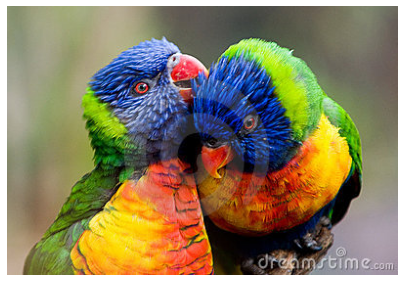

In [50]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [51]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [52]:
new_img = np.array(img, dtype=np.float64) / 255

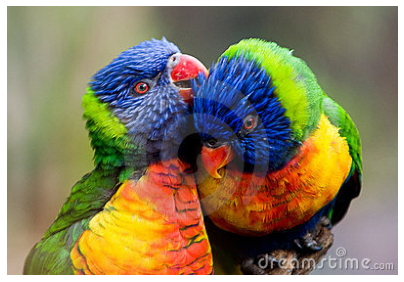

In [53]:
draw_picture(new_img) # нарисовать картинку

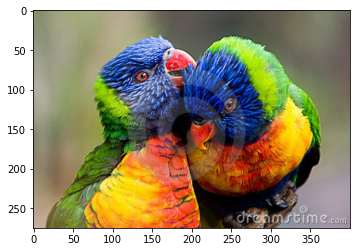

FULL COLOR
N_clusters =  2


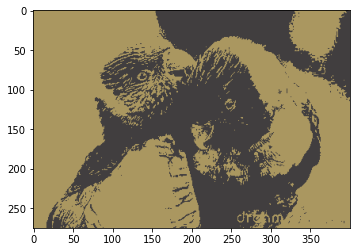

N_clusters =  3


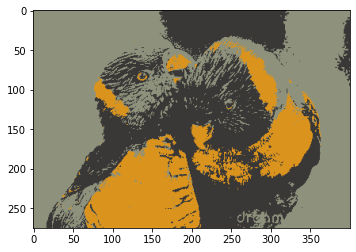

N_clusters =  10


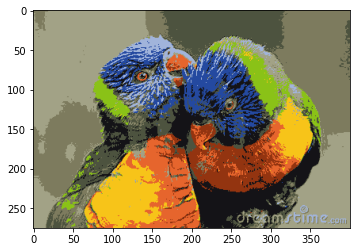

N_clusters =  20


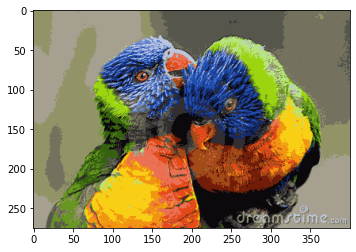

In [54]:
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
from skimage.metrics import structural_similarity as ssim
sample_img = cv2.imread('birds.jpg')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
plt.figure(0)
plt.imshow(sample_img)
plt.show()
print("FULL COLOR")
w,h,r = sample_img.shape
sample_img = sample_img.reshape(w*h,3)
score = []
i = 1
for k in [2, 3, 10, 20]:
    kmeans = KMeans(n_clusters = k).fit(sample_img)
    colors = kmeans.predict(sample_img)

    centers = np.array(kmeans.cluster_centers_)

    new_img = np.copy(sample_img)

    for index in range(len(sample_img)):
        new_img[index] = centers[colors[index]]

    new_img = new_img.reshape(w,h,3)
    plt.figure(i)
    score.append(ssim(img, new_img,multichannel=True))

    i+=1
    plt.imshow(new_img)
    print('N_clusters = ', k)
    plt.show()
    

    
    

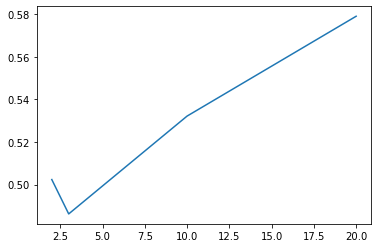

In [55]:
plt.plot([2, 3, 10, 20],score)

In [56]:
sample_img

array([[140, 150, 116],
       [139, 149, 115],
       [137, 147, 113],
       ...,
       [159, 145, 160],
       [158, 144, 159],
       [158, 144, 159]], dtype=uint8)

In [57]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,6,9])
g = np.array([[4,5,6],[1,2,3],[7,6,9]])
print(np.sum(g,axis=0))
print(np.sum(g,axis=0)//len(g))
 

[12 13 18]
[4 4 6]


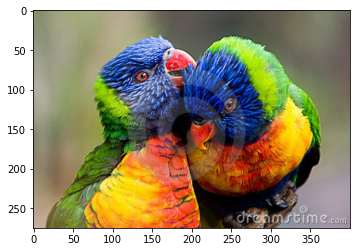

FULL COLOR
0.8790316755275724
min_samples 1


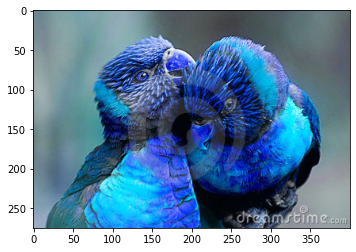

0.39825844585317055
min_samples 2


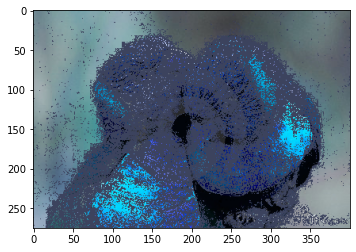

0.33207967961544194
min_samples 5


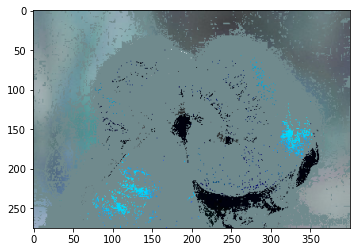

0.1498172502875487
min_samples 10


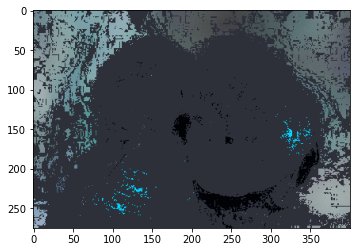

0.14929234397285776
min_samples 20


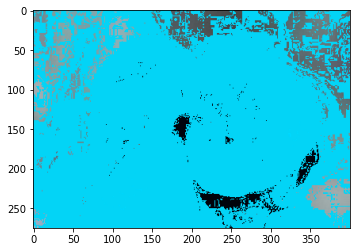

In [58]:
from sklearn.cluster import DBSCAN
score = []
sample_img = cv2.imread('birds.jpg')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
plt.figure(0)
plt.imshow(sample_img)
plt.show()
print("FULL COLOR")
w,h,r = sample_img.shape
sample_img = sample_img.reshape(w*h,3)

for l in [1,2,5,10,20]:
    model = DBSCAN(eps=1.0, min_samples=l)
    colors = model.fit_predict(sample_img)
    centers = {}
    for idx in range(len(sample_img)):
        if colors[idx] in centers:
            tmp = centers[colors[idx]]
            tmp.append(sample_img[idx])
        else:
            centers[colors[idx]] = [sample_img[idx]]
    
    for k in centers.keys():
        tmp = centers[k]
     
        centers[k] = np.sort(tmp)[len(tmp)//2]


    new_img = np.copy(sample_img)

    for index in range(len(sample_img)):
        new_img[index] = centers[colors[index]]
# print(new_img)

    new_img = new_img.reshape(w,h,3)
    plt.figure(i)
    print(ssim(img, new_img,multichannel=True))
    print("min_samples",l)
    score.append(ssim(img, new_img,multichannel=True))

    i+=1
    plt.imshow(new_img)

    plt.show()
    


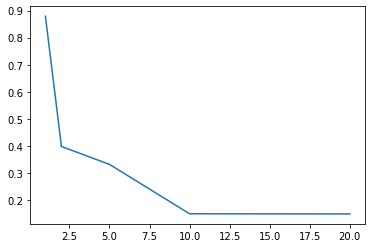

In [59]:
plt.plot([1,2,5,10,20],score)

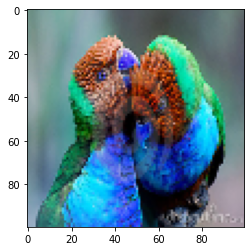

In [60]:
resized_image = cv2.resize(img, (100, 100)) 
plt.imshow(resized_image)

(100, 100, 3)
0.29860320982083277
n_clusters 2 linkage complete


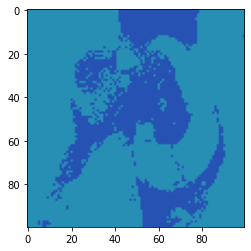

0.1686284319013098
n_clusters 3 linkage average


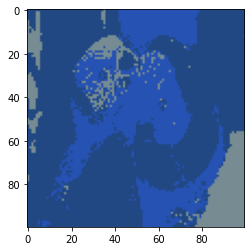

0.31121370649197905
n_clusters 4 linkage single


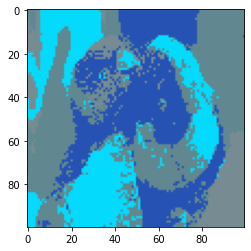

0.1686284319013098
n_clusters 3 linkage complete


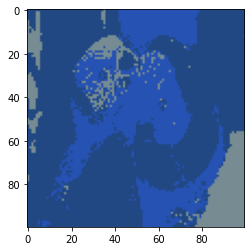

0.31121370649197905
n_clusters 4 linkage average


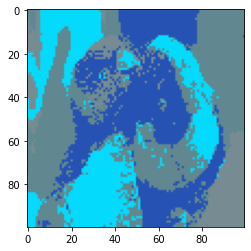

0.39009500814895604
n_clusters 5 linkage single


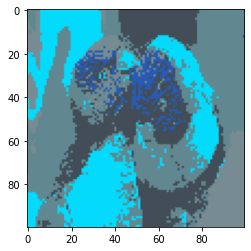

0.5112676905542946
n_clusters 10 linkage complete


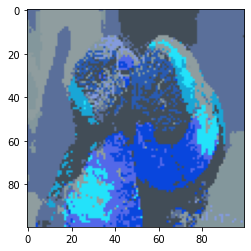

0.511656933008803
n_clusters 11 linkage average


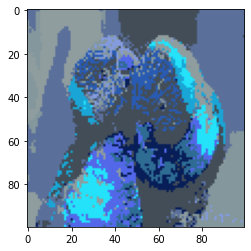

0.5108948761366998
n_clusters 12 linkage single


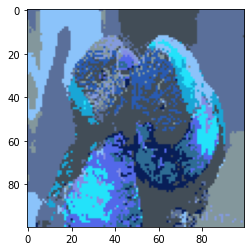

0.6070845575020808
n_clusters 20 linkage complete


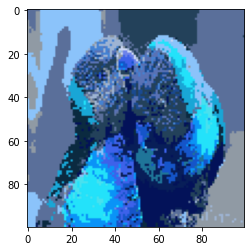

0.6089123823290917
n_clusters 21 linkage average


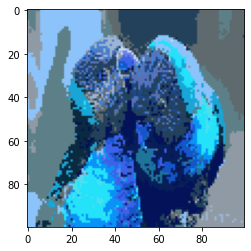

0.6211050987441337
n_clusters 22 linkage single


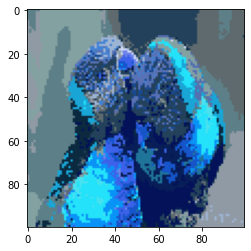

In [61]:
score = []
sample_img = cv2.imread('birds.jpg')
img = cv2.resize(sample_img, (100, 100)) 
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
sample_img = cv2.resize(sample_img, (100, 100)) 
print(sample_img.shape)
w,h,r = sample_img.shape
sample_img = sample_img.reshape(w*h,3)
from sklearn.cluster import AgglomerativeClustering
for i in [2,3,10,20]:
    for lin in ['complete', 'average', 'single']:
        model = AgglomerativeClustering(n_clusters=i, linkage='complete')

        colors = model.fit_predict(sample_img)
        centers = {}

        for idx in range(len(sample_img)):
            if colors[idx] in centers:
                tmp = centers[colors[idx]]
                tmp.append(sample_img[idx])
            else:
                centers[colors[idx]] = [sample_img[idx]]
    
        for k in centers.keys():
            tmp = centers[k]
     
            centers[k] = np.sort(tmp)[len(tmp)//2]


        new_img = np.copy(sample_img)

        for index in range(len(sample_img)):
            new_img[index] = centers[colors[index]]
# print(img_pred)
        new_img = new_img.reshape(w,h,3)
        plt.figure(i)
        print(ssim(img, new_img,multichannel=True))
        print("n_clusters",i,"linkage",lin)
        score.append(ssim(img, new_img,multichannel=True))

        i+=1
        plt.imshow(new_img)

        plt.show()

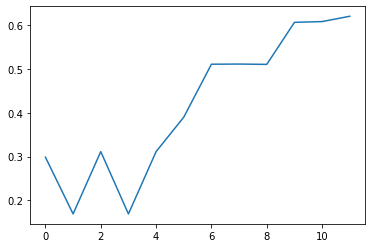

In [62]:
plt.plot(np.arange(12),score)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [2]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [4]:
X_test.shape

(474, 11750)

In [5]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [6]:
y.shape

(2370,)

In [7]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

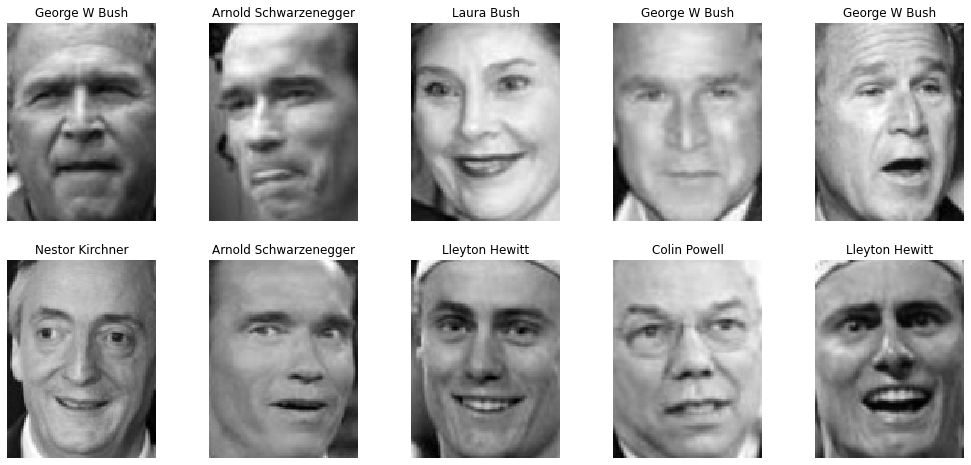

In [8]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [12]:
import collections
len(collections.Counter(names[y]))

34

In [13]:
import collections
collections.Counter(names[y_train])

Counter({'Hugo Chavez': 59,
         'Junichiro Koizumi': 43,
         'Hans Blix': 33,
         'Roh Moo-hyun': 28,
         'Colin Powell': 195,
         'George W Bush': 417,
         'Ariel Sharon': 59,
         'Jacques Chirac': 40,
         'Jennifer Capriati': 38,
         'Gerhard Schroeder': 87,
         'Donald Rumsfeld': 92,
         'Vladimir Putin': 41,
         'Lleyton Hewitt': 31,
         'Laura Bush': 34,
         'Alejandro Toledo': 34,
         'Tony Blair': 110,
         'David Beckham': 26,
         'Serena Williams': 45,
         'Guillermo Coria': 24,
         'Jean Chretien': 45,
         'Gloria Macapagal Arroyo': 36,
         'Nestor Kirchner': 27,
         'Andre Agassi': 29,
         'Luiz Inacio Lula da Silva': 38,
         'Alvaro Uribe': 27,
         'John Ashcroft': 41,
         'Arnold Schwarzenegger': 33,
         'Kofi Annan': 25,
         'Megawati Sukarnoputri': 26,
         'Vicente Fox': 27,
         'Recep Tayyip Erdogan': 22,
         'Silvio B

In [14]:
import numpy as np
y_pred_name = "Tony Blair"
y_pred_train = np.where(names == y_pred_name)*len(y_train)
y_pred_test = np.where(names == y_pred_name)*len(y_test)
y_pred = np.where(names == y_pred_name)*len(y)

In [15]:

from sklearn.metrics import accuracy_score
print("train" ,accuracy_score(y_pred_train,y_train))
print("test" ,accuracy_score(y_pred_test,y_test))
print("overall",accuracy_score(y_pred,y) )

train 0.0580168776371308
test 0.07172995780590717
overall 0.060759493670886074


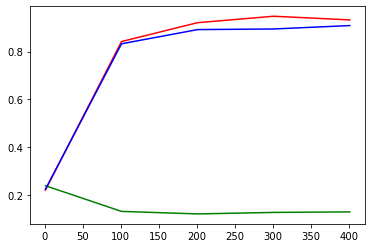

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
train_acc = []
test_acc = []
acc = []
comps = np.arange(1,474,100)

for i in comps:
    svd = TruncatedSVD(n_components=i)
    X_svd_test = svd.fit_transform(X_test)
    X_svd_train = svd.fit_transform(X_train)
    X_svd = svd.fit_transform(X)
#     print(X_svd)
    clf = LogisticRegression(random_state=42).fit(X_svd_train, y_train)
    y_pred_test = clf.predict(X_svd_test)
    y_pred_train = clf.predict(X_svd_train)
    clf2 =  LogisticRegression().fit(X_svd,y)
    y_pred = clf2.predict(X_svd)
    train_acc.append(accuracy_score(y_pred_train,y_train))
    test_acc.append(accuracy_score(y_pred_test,y_test))
    acc.append(accuracy_score(y_pred,y))
    
plt.plot(comps,train_acc,"r")
plt.plot(comps,test_acc,"g")
plt.plot(comps,acc,"b")


    
    

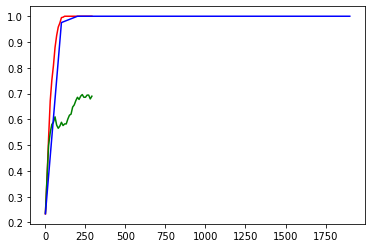

In [32]:
from sklearn.decomposition import PCA

train_acc = []
test_acc = []
acc = []
comps = np.arange(1,300,10)
comps2 = np.arange(1,2000,100)

for i in comps:
    pca = PCA(n_components=i)
    X_pca_train = pca.fit(X_train).transform(X_train)
    X_pca_test = pca.transform(X_test)
    
    
#     print(X_svd)
    clf = LogisticRegression(random_state=42).fit(X_pca_train, y_train)
    y_pred_test = clf.predict(X_pca_test)
    y_pred_train = clf.predict(X_pca_train)
    
    
    train_acc.append(accuracy_score(y_pred_train,y_train))
    test_acc.append(accuracy_score(y_pred_test,y_test))
    
    
for i in comps2:
    pca = PCA(n_components=i)
    X_pca = pca.fit(X).transform(X)
    clf2 =  LogisticRegression().fit(X_pca,y)
    y_pred = clf2.predict(X_pca)
    acc.append(accuracy_score(y_pred,y))
    
    
plt.plot(comps,train_acc,"r")
plt.plot(comps,test_acc,"g")
plt.plot(comps2,acc,"b")


In [33]:
from sklearn.manifold import TSNE
tsne_2 = TSNE(n_components=2, n_iter=400)
tsne_3 = TSNE(n_components=3, n_iter=400)

X_tsne_2 = tsne_2.fit_transform(X)
X_tsne2_test = tsne_2.fit_transform(X_test)
X_tsne2_train = tsne_2.fit_transform(X_train)
clf = LogisticRegression(random_state=42).fit(X_tsne2_train, y_train)
y_pred_test = clf.predict(X_tsne2_test)
y_pred_train = clf.predict(X_tsne2_train)

clf2 =  LogisticRegression().fit(X_tsne_2,y)
y_pred = clf2.predict(X_tsne_2)
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))
print(accuracy_score(y_pred,y))

0.2505274261603376
0.2320675105485232
0.23375527426160336


In [34]:
X_tsne_3 = tsne_3.fit_transform(X)
X_tsne3_test = tsne_3.fit_transform(X_test)
X_tsne3_train = tsne_3.fit_transform(X_train)
clf = LogisticRegression(random_state=42).fit(X_tsne3_train, y_train)
y_pred_test = clf.predict(X_tsne3_test)
y_pred_train = clf.predict(X_tsne3_train)

clf2 =  LogisticRegression().fit(X_tsne_3,y)
y_pred = clf2.predict(X_tsne_3)
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))
print(accuracy_score(y_pred,y))

0.24208860759493672
0.09282700421940929
0.2523206751054852


In [35]:
from sklearn.model_selection import cross_val_score
pca = PCA(n_components=1500)
X_pca = pca.fit(X).transform(X)
 
print('accuracy for data transormed by tSNE-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_3, y,
                                                                             scoring='accuracy').mean()))
print('accuracy for data transormed by PCA is {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca, y,
                                                                            scoring='accuracy').mean()))

accuracy for data transormed by tSNE-2D is 0.24936708860759493
accuracy for data transormed by PCA is 0.70042194092827


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

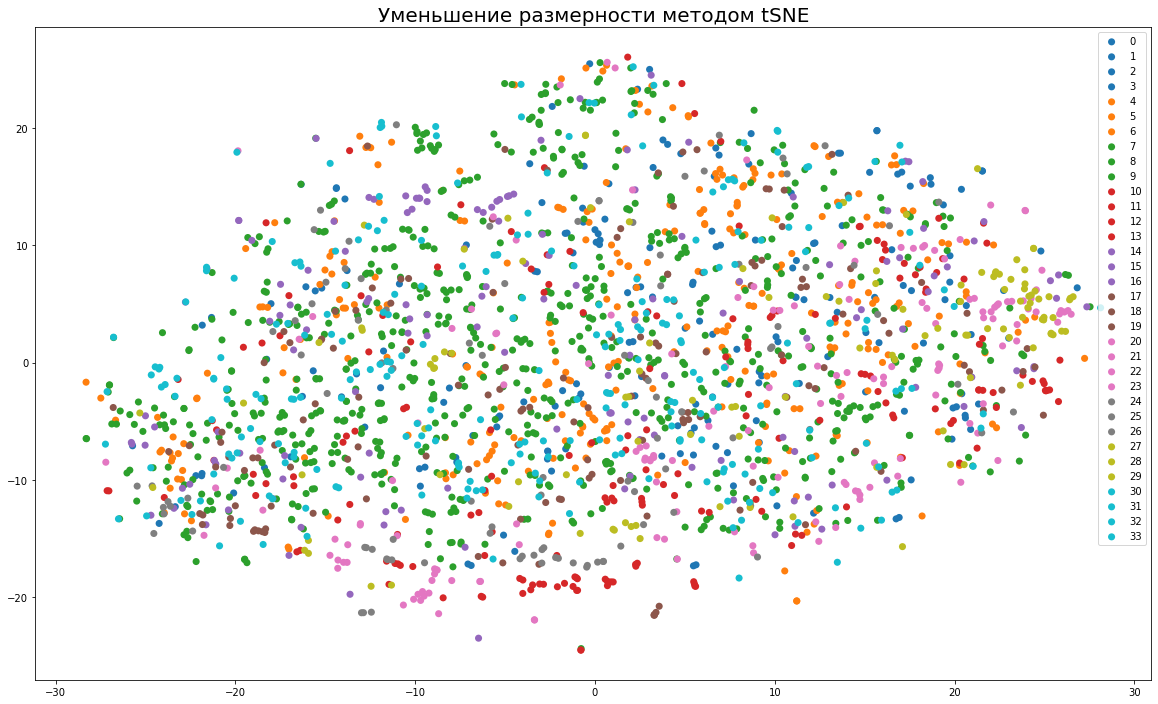

In [121]:
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize
colors = [plt.cm.tab10(i/float(len(collections.Counter(y))-1)) for i in range(len(collections.Counter(y)))]
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(34):
#     norm = Normalize(vmin=0, vmax=10)
#     color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=colors[d], label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

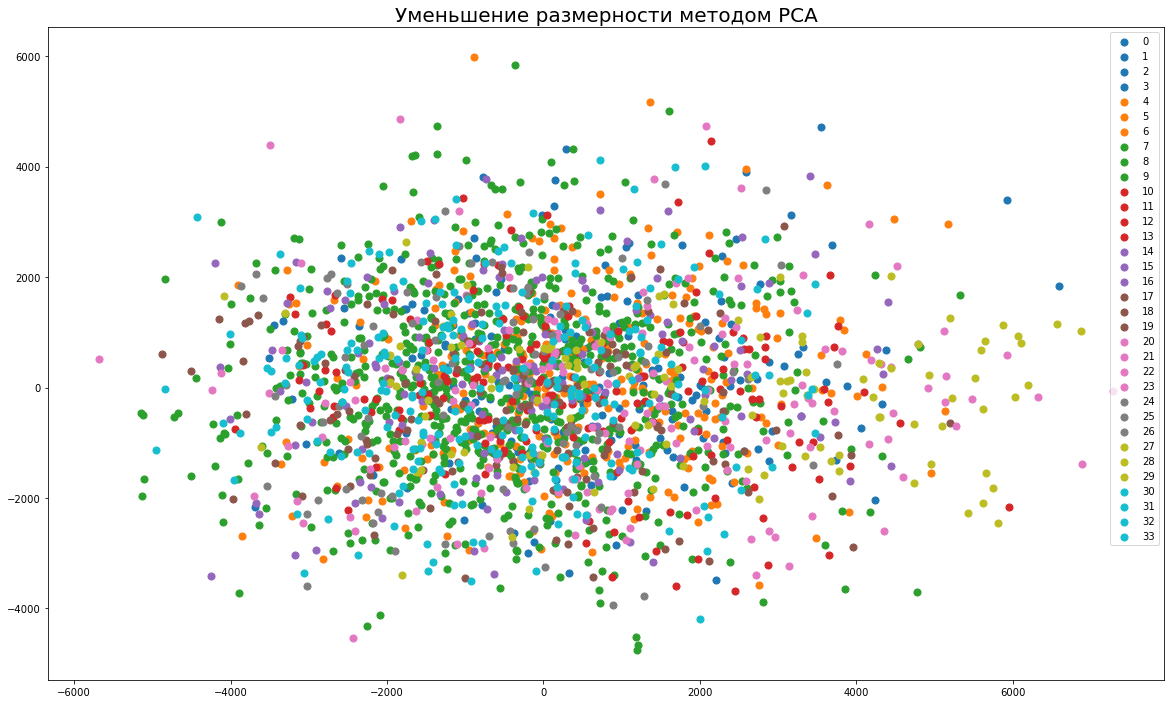

In [122]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit(X).transform(X)
colors = [plt.cm.tab10(i/float(len(collections.Counter(y))-1)) for i in range(len(collections.Counter(y)))]
# print(colors)
plt.figure(figsize=(20, 12))
for d in range(34): # перебираем цифру
#     norm = Normalize(vmin=0, vmax=10) # для красивых цветов
#     color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=colors[d] , label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

In [92]:
pca = PCA(n_components=300)
X_train_pca = pca.fit(X_train).transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
errors = (y_pred != y_test)

print(y_pred[errors][:10])
print(y_test[errors][:10])

[33 14  7 11 33  7 14 31  7  3]
[ 9  9 31  8 15 18 31  4  4  8]


[ 9  9 31  8 15 18 31  4  4  8]


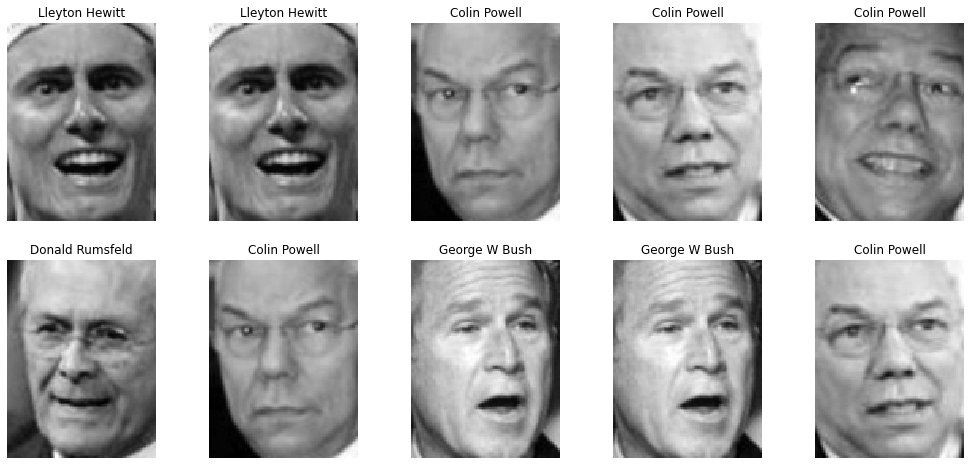

In [93]:
FACES = 10

plt.figure(figsize=(20, 12))
faces = y_test[errors][:FACES]
print(faces)

plot_grid(y_test[errors][:10], 2, 5)

In [94]:
for idx in y_test[errors][:10]:
    print(names[y[idx]])

Lleyton Hewitt
Lleyton Hewitt
Colin Powell
Colin Powell
Colin Powell
Donald Rumsfeld
Colin Powell
George W Bush
George W Bush
Colin Powell


In [95]:
for idx in y_pred[errors][:10]:
    print(names[y_pred[idx]])

George W Bush
George W Bush
Guillermo Coria
George W Bush
George W Bush
Guillermo Coria
George W Bush
Luiz Inacio Lula da Silva
Guillermo Coria
Lleyton Hewitt
